In [1]:
import numpy as np
import mne
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import aseegg as ag
from sklearn.decomposition import FastICA
from sklearn.preprocessing import normalize
from scipy import signal

In [2]:
# częstotliwość próbkowania
sfreq = 250
# ile sygnałów zostaje po ICA
n_signals = 9

In [3]:
# dane dla pierwszej osoby, variancja sygnału dla każdej z elektrod
# print(data[0].shape)
# np.var(data[0][:,:-1], axis=0)

In [4]:
def load_data():
    data = []
    for person in range(1,16):
        print('person', person)
        person_data = np.genfromtxt('Osoba'+ str(person) +'/data'+ str(person) +'_out.csv', delimiter=',')
        data.append(person_data)
    return data

data = load_data()
# print(data[0].shape)
# dane_przed_ica = []
# for i in range(15):
#     dane_przed_ica[i] = np.copy(data[i])
# print(dane_przed_ica.shape)
# # dane_przed_ica[:5,]
# np.var(dane_przed_ica[:,:-1], axis=0)

person 1
person 2
person 3
person 4
person 5
person 6
person 7
person 8
person 9
person 10
person 11
person 12
person 13
person 14
person 15


In [5]:
# analiza składowych niezależnych
# data = load_data()
def ica(data):
    for i in range(15):
        print("person ", i)
        if i not in [3,6,9,14]:
            rs = 67
        elif i == 3:
            rs = 1
        elif i in [6, 14]:
            rs = 36
        else:
            rs = 3
        labels = data[i][:,-1].copy()
        transformer = FastICA(n_components=8, random_state=rs)
        transformed_data = transformer.fit_transform(data[i][:,:-1])
        data[i] = np.hstack((transformed_data, labels.reshape(labels.shape[0],1)))
#     return transformed_data
        
    
# print(data[0].shape)
# ica(data)
# print(data[0].shape)
# dane_po_ICA = data[0].copy()
# print(dane_po_ICA.shape)
# # dane_po_ICA[:5,]
# np.var(dane_po_ICA[:,:-1], axis=0)

In [6]:
# filtracja sygnału

def filter_data(person):
    print('fun',person.shape)
    person[:,0] = ag.pasmowoprzepustowy(person[:,0], sfreq, 1, 10)
    person[:,1] = ag.pasmowoprzepustowy(person[:,1], sfreq, 1, 10)
    person[:,2] = ag.pasmowoprzepustowy(person[:,2], sfreq, 1, 10)
    person[:,3] = ag.pasmowoprzepustowy(person[:,3], sfreq, 1, 10)
    person[:,4] = ag.pasmowoprzepustowy(person[:,4], sfreq, 1, 10)
    person[:,5] = ag.pasmowoprzepustowy(person[:,5], sfreq, 1, 10)
    if n_signals == 9:
        person[:,6] = ag.pasmowoprzepustowy(person[:,6], sfreq, 1, 10)
        person[:,7] = ag.pasmowoprzepustowy(person[:,7], sfreq, 1, 10)
    return person

# print(data[0].shape)
# for i in range(1):
#     data[i] = filter_data(data[i])
# print(data[0].shape)
# dane_po_filtracji = data[0].copy()
# print(dane_po_filtracji.shape)
# np.std(dane_po_filtracji[:,:-1], axis=0)

In [7]:
print(len(data))

15


In [8]:
# loading
print('data', data[0].shape)
dane_przed_ica = []
for i in range(15):
    dane_przed_ica.append(np.copy(data[i]))
    print('dane_przed_ica', dane_przed_ica[i].shape)
# ica
ica(data)
print('data', data[0].shape)
dane_po_ICA = []
for i in range(15):
    dane_po_ICA.append(np.copy(data[i]))
    print('dane_po_ICA', dane_po_ICA[i].shape)
# filtering
print('data', data[0].shape)
dane_po_filtracji = []
for i in range(15):
    data[i] = filter_data(data[i])
    dane_po_filtracji.append(np.copy(data[i]))
    print('dane_po_filtracji', dane_po_filtracji[i].shape)

data (125412, 9)
dane_przed_ica (125412, 9)
dane_przed_ica (120844, 9)
dane_przed_ica (122889, 9)
dane_przed_ica (126859, 9)
dane_przed_ica (123379, 9)
dane_przed_ica (129516, 9)
dane_przed_ica (126254, 9)
dane_przed_ica (130102, 9)
dane_przed_ica (123128, 9)
dane_przed_ica (122406, 9)
dane_przed_ica (125173, 9)
dane_przed_ica (124690, 9)
dane_przed_ica (126283, 9)
dane_przed_ica (124690, 9)
dane_przed_ica (125172, 9)
person  0
person  1
person  2
person  3
person  4
person  5
person  6
person  7
person  8
person  9
person  10
person  11
person  12
person  13
person  14
data (125412, 9)
dane_po_ICA (125412, 9)
dane_po_ICA (120844, 9)
dane_po_ICA (122889, 9)
dane_po_ICA (126859, 9)
dane_po_ICA (123379, 9)
dane_po_ICA (129516, 9)
dane_po_ICA (126254, 9)
dane_po_ICA (130102, 9)
dane_po_ICA (123128, 9)
dane_po_ICA (122406, 9)
dane_po_ICA (125173, 9)
dane_po_ICA (124690, 9)
dane_po_ICA (126283, 9)
dane_po_ICA (124690, 9)
dane_po_ICA (125172, 9)
data (125412, 9)
fun (125412, 9)
dane_po_filtr

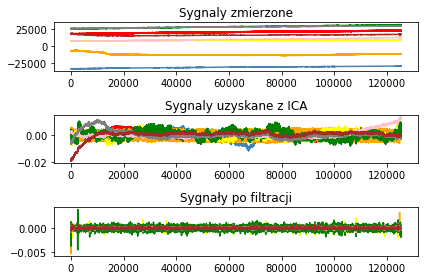

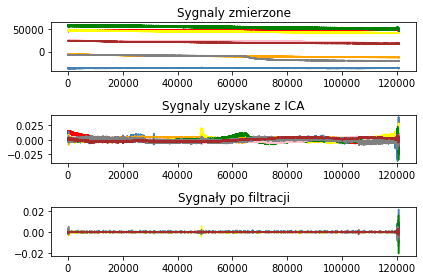

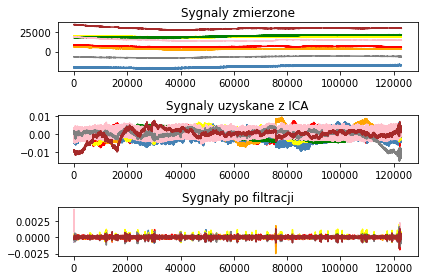

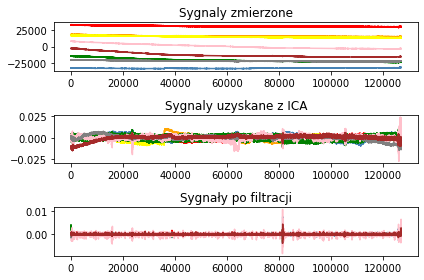

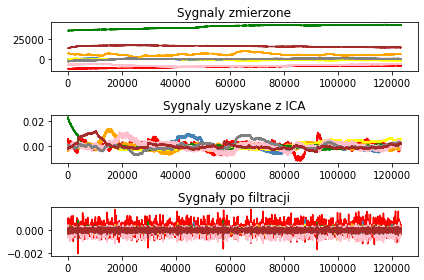

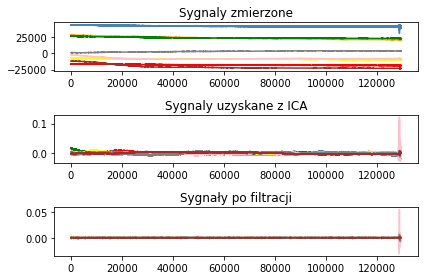

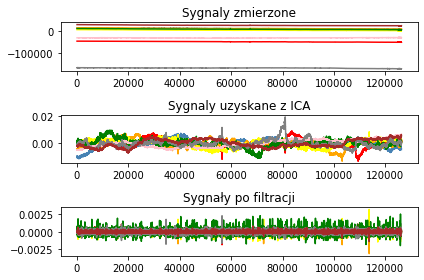

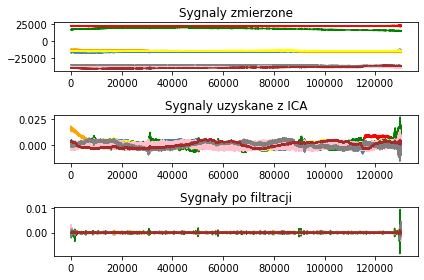

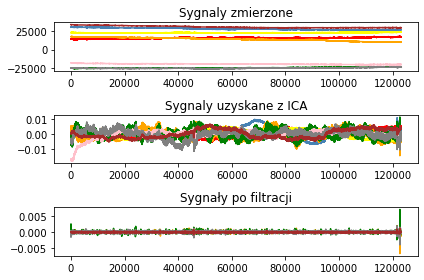

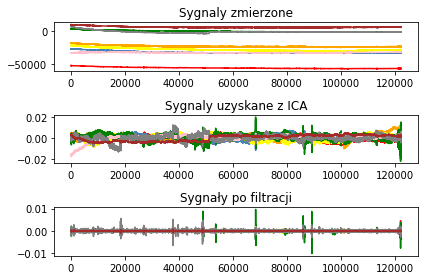

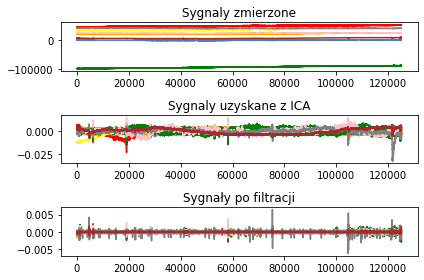

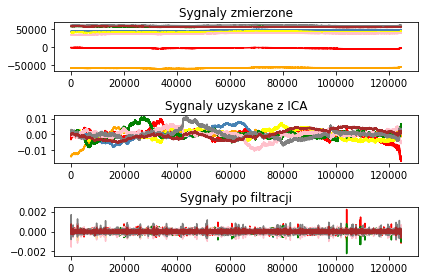

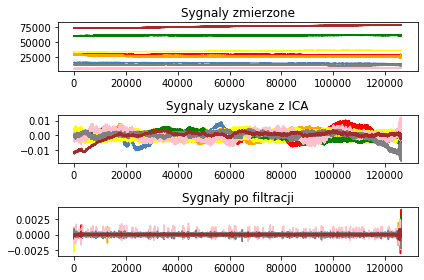

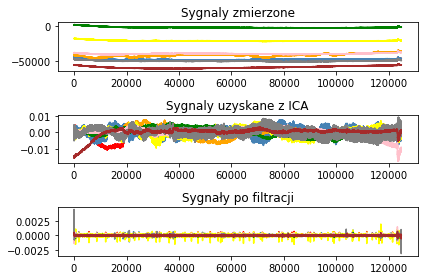

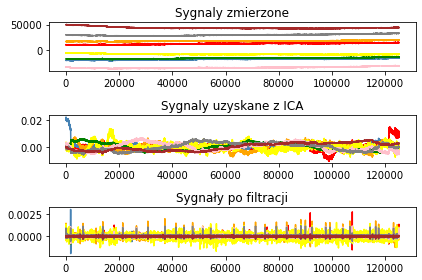

In [9]:
# Plot results

for j in range(15):
    plt.figure()

    models = [dane_przed_ica[j][:,:-1], dane_po_ICA[j][:,:-1], dane_po_filtracji[j][:,:-1]]
    names = ['Sygnaly zmierzone',
             'Sygnaly uzyskane z ICA',
             'Sygnały po filtracji']
    colors = ['red', 'steelblue', 'orange', 'yellow', 'green', 'pink', 'grey', 'brown']

    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(3, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
    #         plt.figure(figsize=(14,4))
            plt.plot(sig, color=color)

    plt.tight_layout()
    plt.show()

In [ ]:
# dane dla pierwszej osoby po ICA
# print(data[0].shape)
# np.var(data[0][:,:-1], axis=0)

In [ ]:
# data[0].shape

In [ ]:
# normalizacja sygnału

def norm(person):
    normalize(person[:,:-1], norm='max', axis=0, copy=False)
    
# for i in range(15):
#     norm(data[i])

### wycinanie kawałków dla różnych typów eventów

In [ ]:
# wycinanie 1-sekundowych kawałków danych (od 100 ms po naciśnięciu spacji do 600 ms po) dla udanych naciśnięć spacji
# dla jednego eventu zapisuję 125 wierszy danych

def cut_successful(person):
    successful_clicks = np.empty([0,n_signals])
    event = False
    for row in range(person.shape[0]):
        if person[row, n_signals-1] == 1 and event == False:
            successful_clicks = np.vstack((successful_clicks, person[row+25:row+150, :n_signals]))
            event = True
        elif person[row, n_signals-1] != 1:
            event = False
    return successful_clicks

# successful_clicks = [0 for x in range(15)]
# for i in range(15):
#     print(data[i].shape)
#     successful_clicks[i] = cut_successful(data[i][:,:n_signals])

In [ ]:
# liczba eventów tego typu
# successful_num = int(successful_clicks[14].shape[0]/sfreq)

In [ ]:
# wycinanie 1-sekundowych kawałków dnaych (od 100 ms po naciśnięciu spacji do 600 ms po) dla nieudanych naciśnięć spacji
# spowodowanych błędem interfejsu
# dla jednego eventu zapisuję 125 wierszy danych

def cut_i_errors(person):
    interface_errors = np.empty([0,n_signals])
    event = False
    for row in range(person.shape[0]):
        if person[row, n_signals-1] == 4 and event == False:
            interface_errors = np.vstack((interface_errors, person[row+25:row+150, :n_signals]))
            event = True
        elif person[row, n_signals-1] != 4:
            event = False
    return interface_errors

# interface_errors = [0 for x in range(15)]
# for i in range(15):
#     interface_errors[i] = cut_i_errors(data[i][:,:n_signals])

In [ ]:
# wycinanie 1-sekundowych kawałków dnaych (od 100 ms po naciśnięciu spacji do 600 ms po) dla nieudanych naciśnięć spacji
# spowodowanych błędem osoby badanej
# dla jednego eventu zapisuję 125 wierszy danych

def cut_p_errors(person):
    person_errors = np.empty([0,n_signals])
    event = False
    for row in range(person.shape[0]):
        if person[row, n_signals-1] == 5 and event == False:
            person_errors = np.vstack((person_errors, person[row+25:row+150, :n_signals]))
            event = True
        elif person[row, n_signals-1] != 5:
            event = False
    return person_errors

# person_errors = [0 for x in range(15)]
# for i in range(15):
#     person_errors[i] = cut_p_errors(data[i][:,:n_signals])

In [ ]:
# liczba eventów tego typu
# errors_num = int(interface_errors[14].shape[0]/sfreq)

### cechy morfologiczne

In [ ]:
# morphological features 1 (latency)
# returns index of max value of sequence
# stop value is NOT checked 
def lat(sequence, start, stop):
    index = sequence.iloc[start:stop].argmax()
    return start + index

# index = lat(fragment, 0, 250)
# print(index)

In [ ]:
# morphological features 2 (amplitude)
# returns max value of start:stop slice of sequence
def amp(sequence, start, stop):
    index = sequence.iloc[start:stop].argmax()
    return sequence.iat[start + index]

# value = amp(fragment, 0, 250)
# print(value)

In [ ]:
# morphological features 3 (latency/amplitude ratio)
# need to compute lat() and amp() first, their arguments should be the same
def lar(latency, amplitude):
    if amplitude == 0: return False
    return latency/amplitude

# lat_amp = lar(index, value)
# print(lat_amp)

In [ ]:
# morphological features 4 (absolute amplitude)
# need to compute amp() first
def aamp(amplitude):
    return abs(amplitude)
    
# abs_amp = aamp(value)
# print(abs_amp)

In [ ]:
# morphological features 5 (absolute latency/amplitude ratio)
# need to compute lar() first
def alar(ratio):
    return abs(ratio)

# abs_lat_amp = alar(lat_amp)
# print(abs_lat_amp)

In [ ]:
# morphological features 6 (positive area)
# returns sum of the positive signal values
def par(sequence, start, stop):
    pos_sum = 0
    for row in sequence.iloc[start:stop]:
        pos_sum += (0.5 * (row + abs(row)))
    return pos_sum

# pos_area = par(fragment, 0, 5)
# print(pos_area)

In [ ]:
# morphological features 7 (negative area)
# returns sum of the negative signal values
def nar(sequence, start, stop):
    neg_sum = 0
    for row in sequence.iloc[start:stop]:
        neg_sum += (0.5 * (row - abs(row)))
    return neg_sum

# neg_area = nar(fragment, 0, 5)
# print(neg_area)

In [ ]:
# morphological features 8 (total area)
# need to compute par() and nar() first
def tar(pos_area, neg_area):
    return pos_area + neg_area

# total_area = tar(pos_area, neg_area)
# print(total_area)

In [ ]:
# morphological features 9 (absolute total area)
# need to compute tar() first
def atar(total_area):
    return abs(total_area)

# abs_tot_area = atar(total_area)
# print(abs_tot_area)

In [ ]:
# morphological features 10 (total absolute area)
# need to compute par() and nar() first
def taar(pos_area, neg_area):
    return pos_area + abs(neg_area)

# tot_abs_area = taar(pos_area, neg_area)
# print(tot_abs_area)

In [ ]:
# morphological features 11 (average absolute signal slope)
# returns sum of differences between rows
# number of differences n = stop - start -1
def aass(sequence, start, stop):
    slope_sum = 0
    prev_row = sequence.iat[start]
    for row in sequence.iloc[start:stop]:
        slope_sum += abs(row - prev_row)
        prev_row = row
    return slope_sum

# slope_sum = aass(fragment, 1, 4)
# print(slope_sum)

In [ ]:
# morphological features 12 (peak to peak)
# returns difference between max and min value
def pp(sequence, start, stop):
    index_max = sequence.iloc[start:stop].argmax()
    index_min = sequence.iloc[start:stop].argmin()
    return sequence.iat[start + index_max] - sequence.iat[start + index_min]
    
# p_to_p = pp(fragment, 0, 500)
# print(p_to_p)

In [ ]:
# morphological features 13 (peak to peak time window)
# returns distance between max and min value
def ppt(sequence, start, stop):
    index_max = sequence.iloc[start:stop].argmax()
    index_min = sequence.iloc[start:stop].argmin()
    return index_max - index_min
    
# pp_time = ppt(fragment, 1, 4)
# print(pp_time)

In [ ]:
# morphological features 14 (peak to peak slope)
# need to compute pp() and ppt() first
def pps(p_to_p, pp_time):
    return p_to_p/pp_time

# pp_slope = pps(p_to_p, pp_time)
# print(pp_slope)

In [ ]:
# morphological features 15 (zero crossings)
# returns number of zero crossings between min and max peak
# czy if nie byłby czasowo korzystniejszy niż mnożenie?
def zc(sequence):
    index_max = sequence.argmax()
    index_min = sequence.argmin()
    zero_cross = 0
    if index_max >= index_min:
        prev_row = sequence.iat[index_min]
        for row in sequence.iloc[index_min+1:index_max+1]:
            if prev_row * row < 0:
                zero_cross += 1
            prev_row = row
    elif index_max < index_min:
        prev_row = sequence.iat[index_max]
        for row in sequence.iloc[index_max+1:index_min+1]:
            if prev_row * row < 0:
                zero_cross += 1
            prev_row = row         
    return zero_cross

# zero_cross = zc(fragment)
# print(zero_cross)

In [ ]:
# morphological features 16 (zero crossings density)
# need to compute ppt() and zc() first
def zcd(pp_time, zero_cross):
    return zero_cross/pp_time

# zero_cross_den = zcd(pp_time, zero_cross)
# print(zero_cross_den)

In [ ]:
# morphological features 17 (slope sign alterations)
# matematyczny sposób tu nie daje rady więc są ify
def ssa(sequence, start, stop):
    slope_alt = 0
    first_row = sequence.iat[start]
    second_row = sequence.iat[start+1]
    for third_row in sequence.iloc[start+2:stop]:
        if first_row-second_row < 0:
            if third_row-second_row < 0:
                slope_alt += 1
        elif first_row-second_row > 0:
            if third_row-second_row > 0:
                slope_alt += 1
        first_row = second_row
        second_row = third_row
    return slope_alt
    
# slope_alt = ssa(fragment, 0, 250)
# print(slope_alt)

### liczenie cech dla wszystkich kawałków danych
##### wiem, że to mogłaby być 1 funkcja ale tak było szybciej :(

In [ ]:
# calculate 17 features for all successful clicks for all electrodes
def calculate_s_features(person):
    suc_features_df = pd.DataFrame()
    if n_signals == 9:
        e_names = ['FCz_','Cz_','Fz_','Pz_','C3_','C4_','F3_','F4_']
    else:
        e_names = ['sig1_', 'sig2_', 'sig3_', 'sig4_', 'sig5_', 'sig6_']
    for electrode in range(n_signals-1):
#         start = 0
#         stop = 250
        start = 0
        stop = 125
        f1 = []
        f2 = []
        f3 = []
        f4 = []
        f5 = []
        f6 = []
        f7 = []
        f8 = []
        f9 = []
        f10 = []
        f11 = []
        f12 = []
        f13 = []
        f14 = []
        f15 = []
        f16 = []
        f17 = []

        for index in range(int(person.shape[0]/int(sfreq/2))):
            fragment = person_successful_clicks.iloc[int(sfreq/2)*index:int(sfreq/2)*(index+1), electrode]
        #     feature 1
            latency = lat(fragment, start, stop)
            f1.append(latency)
        #     feature 2
            amplitude = amp(fragment, start, stop)
            f2.append(amplitude)
        #     feature 3
            lat_amp_ratio = lar(latency, amplitude)
            f3.append(lat_amp_ratio)
        #     feature 4
            abs_amp = aamp(amplitude)
            f4.append(abs_amp)
        #     feature 5
            abs_lat_amp_ratio = alar(lat_amp_ratio)
            f5.append(abs_lat_amp_ratio)
        #     feature 6
            pos_area = par(fragment, start, stop)
            f6.append(pos_area)
        #     feature 7
            neg_area = nar(fragment, start, stop)
            f7.append(neg_area)
        #     feature 8
            total_area = tar(pos_area, neg_area)
            f8.append(total_area)
        #     feature 9
            abs_tot_area = atar(total_area)
            f9.append(abs_tot_area)
        #     feature 10
            tot_abs_area = taar(pos_area, neg_area)
            f10.append(tot_abs_area)
        #     feature 11
            slope_sum = aass(fragment, start, stop)
            f11.append(slope_sum)
        #     feature 12
            p_to_p = pp(fragment, start, stop)
            f12.append(p_to_p)
        #     feature 13
            pp_time = ppt(fragment, start, stop)
            f13.append(pp_time)
        #     feature 14
            pp_slope = pps(p_to_p, pp_time)
            f14.append(pp_slope)
        #     feature 15
            zero_cross = zc(fragment)
            f15.append(zero_cross)
        #     feature 16
            zero_cross_den = zcd(pp_time, zero_cross)
            f16.append(zero_cross_den)
        #     feature 17
            slope_alt = ssa(fragment, start, stop)
            f17.append(slope_alt)

        temp_df = pd.DataFrame({e_names[electrode]+'1': f1, e_names[electrode]+'2': f2, e_names[electrode]+'3': f3, e_names[electrode]+'4': f4, e_names[electrode]+'5': f5, e_names[electrode]+'6': f6, e_names[electrode]+'7': f7, e_names[electrode]+'8': f8, e_names[electrode]+'9': f9, e_names[electrode]+'10': f10, e_names[electrode]+'11': f11, e_names[electrode]+'12': f12, e_names[electrode]+'13': f13, e_names[electrode]+'14': f14, e_names[electrode]+'15': f15, e_names[electrode]+'16': f16, e_names[electrode]+'17': f17})
        suc_features_df = pd.concat([suc_features_df, temp_df], axis=1)
    suc_features_df['event'] = [1] * int(person.shape[0]/int(sfreq/2))
    return suc_features_df

In [ ]:
# calculate 17 features for all interface errors for all electrodes
def calculate_e_features(person):
    features_df = pd.DataFrame()
    if n_signals == 9:
        e_names = ['FCz_','Cz_','Fz_','Pz_','C3_','C4_','F3_','F4_']
    else:
        e_names = ['sig1_', 'sig2_', 'sig3_', 'sig4_', 'sig5_', 'sig6_']
    for electrode in range(n_signals-1):
        start = 0
        stop = 125
        f1 = []
        f2 = []
        f3 = []
        f4 = []
        f5 = []
        f6 = []
        f7 = []
        f8 = []
        f9 = []
        f10 = []
        f11 = []
        f12 = []
        f13 = []
        f14 = []
        f15 = []
        f16 = []
        f17 = []
        for index in range(int(person.shape[0]/int(sfreq/2))):
#             print("electrode", electrode)
#             print("index", index)
#             print("od: ", sfreq*index)
#             print("do: ", sfreq*(index+1))
            fragment = person_interface_errors.iloc[int(sfreq/2)*index:int(sfreq/2)*(index+1), electrode]
#             print(fragment)
        #     feature 1
            latency = lat(fragment, start, stop)
            f1.append(latency)
        #     feature 2
            amplitude = amp(fragment, start, stop)
            f2.append(amplitude)
        #     feature 3
            lat_amp_ratio = lar(latency, amplitude)
            f3.append(lat_amp_ratio)
        #     feature 4
            abs_amp = aamp(amplitude)
            f4.append(abs_amp)
        #     feature 5
            abs_lat_amp_ratio = alar(lat_amp_ratio)
            f5.append(abs_lat_amp_ratio)
        #     feature 6
            pos_area = par(fragment, start, stop)
            f6.append(pos_area)
        #     feature 7
            neg_area = nar(fragment, start, stop)
            f7.append(neg_area)
        #     feature 8
            total_area = tar(pos_area, neg_area)
            f8.append(total_area)
        #     feature 9
            abs_tot_area = atar(total_area)
            f9.append(abs_tot_area)
        #     feature 10
            tot_abs_area = taar(pos_area, neg_area)
            f10.append(tot_abs_area)
        #     feature 11
            slope_sum = aass(fragment, start, stop)
            f11.append(slope_sum)
        #     feature 12
            p_to_p = pp(fragment, start, stop)
            f12.append(p_to_p)
        #     feature 13
            pp_time = ppt(fragment, start, stop)
            f13.append(pp_time)
        #     feature 14
            pp_slope = pps(p_to_p, pp_time)
            f14.append(pp_slope)
        #     feature 15
            zero_cross = zc(fragment)
            f15.append(zero_cross)
        #     feature 16
            zero_cross_den = zcd(pp_time, zero_cross)
            f16.append(zero_cross_den)
        #     feature 17
            slope_alt = ssa(fragment, start, stop)
            f17.append(slope_alt)

        temp_df = pd.DataFrame({e_names[electrode]+'1': f1, e_names[electrode]+'2': f2, e_names[electrode]+'3': f3, e_names[electrode]+'4': f4, e_names[electrode]+'5': f5, e_names[electrode]+'6': f6, e_names[electrode]+'7': f7, e_names[electrode]+'8': f8, e_names[electrode]+'9': f9, e_names[electrode]+'10': f10, e_names[electrode]+'11': f11, e_names[electrode]+'12': f12, e_names[electrode]+'13': f13, e_names[electrode]+'14': f14, e_names[electrode]+'15': f15, e_names[electrode]+'16': f16, e_names[electrode]+'17': f17})
        features_df = pd.concat([features_df, temp_df], axis=1)
    features_df['event'] = [4] * int(person.shape[0]/int(sfreq/2))
    return features_df



In [ ]:
# calculate 17 features for all person errors for all electrodes
def calculate_p_e_features(person):
    perr_features_df = pd.DataFrame()
    if n_signals == 9:
        e_names = ['FCz_','Cz_','Fz_','Pz_','C3_','C4_','F3_','F4_']
    else:
        e_names = ['sig1_', 'sig2_', 'sig3_', 'sig4_', 'sig5_', 'sig6_']
    for electrode in range(n_signals-1):
        start = 0
        stop = 125
        f1 = []
        f2 = []
        f3 = []
        f4 = []
        f5 = []
        f6 = []
        f7 = []
        f8 = []
        f9 = []
        f10 = []
        f11 = []
        f12 = []
        f13 = []
        f14 = []
        f15 = []
        f16 = []
        f17 = []
        for index in range(int(person.shape[0]/int(sfreq/2))):
#             print("electrode", electrode)
#             print("index", index)
#             print("od: ", sfreq*index)
#             print("do: ", sfreq*(index+1))
            fragment = person_person_errors.iloc[int(sfreq/2)*index:int(sfreq/2)*(index+1), electrode]
#             print(fragment)
        #     feature 1
            latency = lat(fragment, start, stop)
            f1.append(latency)
        #     feature 2
            amplitude = amp(fragment, start, stop)
            f2.append(amplitude)
        #     feature 3
            lat_amp_ratio = lar(latency, amplitude)
            f3.append(lat_amp_ratio)
        #     feature 4
            abs_amp = aamp(amplitude)
            f4.append(abs_amp)
        #     feature 5
            abs_lat_amp_ratio = alar(lat_amp_ratio)
            f5.append(abs_lat_amp_ratio)
        #     feature 6
            pos_area = par(fragment, start, stop)
            f6.append(pos_area)
        #     feature 7
            neg_area = nar(fragment, start, stop)
            f7.append(neg_area)
        #     feature 8
            total_area = tar(pos_area, neg_area)
            f8.append(total_area)
        #     feature 9
            abs_tot_area = atar(total_area)
            f9.append(abs_tot_area)
        #     feature 10
            tot_abs_area = taar(pos_area, neg_area)
            f10.append(tot_abs_area)
        #     feature 11
            slope_sum = aass(fragment, start, stop)
            f11.append(slope_sum)
        #     feature 12
            p_to_p = pp(fragment, start, stop)
            f12.append(p_to_p)
        #     feature 13
            pp_time = ppt(fragment, start, stop)
            f13.append(pp_time)
        #     feature 14
            pp_slope = pps(p_to_p, pp_time)
            f14.append(pp_slope)
        #     feature 15
            zero_cross = zc(fragment)
            f15.append(zero_cross)
        #     feature 16
            zero_cross_den = zcd(pp_time, zero_cross)
            f16.append(zero_cross_den)
        #     feature 17
            slope_alt = ssa(fragment, start, stop)
            f17.append(slope_alt)

        temp_df = pd.DataFrame({e_names[electrode]+'1': f1, e_names[electrode]+'2': f2, e_names[electrode]+'3': f3, e_names[electrode]+'4': f4, e_names[electrode]+'5': f5, e_names[electrode]+'6': f6, e_names[electrode]+'7': f7, e_names[electrode]+'8': f8, e_names[electrode]+'9': f9, e_names[electrode]+'10': f10, e_names[electrode]+'11': f11, e_names[electrode]+'12': f12, e_names[electrode]+'13': f13, e_names[electrode]+'14': f14, e_names[electrode]+'15': f15, e_names[electrode]+'16': f16, e_names[electrode]+'17': f17})
        perr_features_df = pd.concat([perr_features_df, temp_df], axis=1)
    perr_features_df['event'] = [5] * int(person.shape[0]/int(sfreq/2))
    return perr_features_df

### właściwy kod przetwarzający dane

In [ ]:
print("loading data\n")
data = load_data()
dane_przed_ica = np.copy(data[0])
print(data[0].shape)
print(np.var(data[0][:,:-1], axis=0))

print("\nperforming ICA\n")
ica(data)
dane_po_ICA = data[0].copy()
print(data[0].shape)
print(np.var(data[0][:,:-1], axis=0))

print("\nfiltering data\n")
for i in range(15):
    data[i] = filter_data(data[i])
    print(data[i].shape)
    print(np.var(data[i][:,:-1], axis=0))
dane_po_filtracji = data[0].copy()

# print("\nnormalizing data\n")
# for i in range(15):
#     norm(data[i])
#     print(data[i].shape)
#     print(np.var(data[i][:,:-1], axis=0))
# dane_po_normalizacji = data[0].copy()

# Plot results

plt.figure()

models = [dane_przed_ica[:,:-1], dane_po_ICA[:,:-1], dane_po_filtracji[:,:-1]]
names = ['Sygnaly zmierzone',
         'Sygnaly uzyskane z ICA',
         'Sygnały po filtracji']
colors = ['red', 'steelblue', 'orange', 'yellow', 'green', 'pink', 'grey', 'brown']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

print("\ncutting successful clicks\n")
successful_clicks = [0 for x in range(15)]
for i in range(15):
#     print(data[i].shape)
    successful_clicks[i] = cut_successful(data[i][:,:n_signals])
    print(successful_clicks[i].shape)

print("\ncutting interface errors\n")
interface_errors = [0 for x in range(15)]
for i in range(15):
    interface_errors[i] = cut_i_errors(data[i][:,:n_signals])
    print(interface_errors[i].shape)

print("\ncutting person errors\n")
person_errors = [0 for x in range(15)]
for i in range(15):
    person_errors[i] = cut_p_errors(data[i][:,:n_signals])
    print(person_errors[i].shape)

print("\ncalculating features\n")
for i in range(15):
    print("osoba: ", i)
#     calculate features for successful clicks
    person_successful_clicks = pd.DataFrame(data=successful_clicks[i])
    succ_features = calculate_s_features(person_successful_clicks)
#     calculate features for interface errors
    person_interface_errors = pd.DataFrame(data=interface_errors[i])
    err_features = calculate_e_features(person_interface_errors)
#     calculate features for person errors
    person_person_errors = pd.DataFrame(data=person_errors[i])
    print(person_person_errors.shape)
    person_err_features = calculate_p_e_features(person_person_errors)
    print("udane kliknięcia", succ_features.shape)
    print("błędy interfejsu", err_features.shape)
    print("błędy osoby", person_err_features.shape)
#     concatenate errors and successes
    features_df = pd.concat([succ_features, err_features, person_err_features])
#     write to csv
    features_df.to_csv("Features_os" + str(i) + ".csv", index=False)